#Lab 3
The prupose of this lab is to examine hawks data and gain insights into the data using statistics and coorelations.

#Import Libraries

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import sympy
import pandas as pd
import seaborn as sns


In [ ]:
from google.colab import drive #mount drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Data

In [ ]:
path_data = "/content/drive/MyDrive/CS 356/Hawks.csv" # path to the data on my drive
data = pd.read_csv(path_data, delimiter=",") # read the csv file
pd.set_option('display.max_columns', None) #ensures all columns are printed
data

,rownames,Month,Day,Year,CaptureTime,ReleaseTime,BandNumber,Species,Age,Sex,Wing,Weight,Culmen,Hallux,Tail,StandardTail,Tarsus,WingPitFat,KeelFat,Crop
0,1,9,19,1992,13:30,NaN,877-76317,RT,I,NaN,385.0,920.0,25.7,30.1,219,NaN,NaN,NaN,NaN,NaN
1,2,9,22,1992,10:30,,877-76318,RT,I,NaN,376.0,930.0,NaN,NaN,221,NaN,NaN,NaN,NaN,NaN
2,3,9,23,1992,12:45,,877-76319,RT,I,NaN,381.0,990.0,26.7,31.3,235,NaN,NaN,NaN,NaN,NaN
3,4,9,23,1992,10:50,,745-49508,CH,I,F,265.0,470.0,18.7,23.5,220,NaN,NaN,NaN,NaN,NaN
4,5,9,27,1992,11:15,,1253-98801,SS,I,F,205.0,170.0,12.5,14.3,157,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,904,11,18,2003,14:44,,1177-04777,RT,I,NaN,380.0,1525.0,26.0,27.6,224,227.0,NaN,NaN,3.0,0.0
904,905,11,19,2003,10:18,,803-05985,SS,I,F,190.0,175.0,12.7,15.4,150,153.0,NaN,NaN,4.0,0.0
905,906,11,19,2003,12:02,,1807-53145,RT,I,NaN,360.0,790.0,21.9,27.6,211,215.0,NaN,NaN,2.0,0.0
906,907,11,20,2003,9:56,,1177-04778,RT,I,NaN,369.0,860.0,25.2,28.0,207,210.0,NaN,NaN,2.0,0.0


# About Data

In [ ]:
data.info()

NameError: name 'data' is not defined

The hawks dataset has 908 entries each corrosponding to a bird captured. There is missing values from this dataset. The columns missing over 75% of data will be removed, and the rows missing data from the other columns will also be removed. The mean, median, or mode can be used to fill missing values, but it doesn't make sense to use those for these columns. ML can be used to see which species might be more frequently captured in certain months or used to predict characteristics of the birdd. The dataset features the following columns:

The dataset features the following columns:

Month: Categorical, representing the month of capture, ranging from 8 (September) to 12 (December).

Day: Categorical, indicating the day of the month on which the bird was captured.

Year: Categorical, ranging from 1992 to 2003, denoting the year of capture.

CaptureTime: Time of capture, noted in HH:MM format.

ReleaseTime: Time of release, also in HH:MM format.

BandNumber: A unique ID band code identifying each bird.

Species: Categorical, with possible values CH (Cooper's Hawk), RT (Red-tailed Hawk), and SS (Sharp-Shinned Hawk).

Age: Categorical, indicating if the bird is an Adult (A) or Immature (I).

Sex: Categorical, noted as Female (F) or Male (M).

Wing: Numerical, the length in mm of the primary wing feather from the tip to the wrist it attaches to.

Weight: Numerical, the body weight of the bird in grams.

Culmen: Numerical, the length in mm of the upper bill from the tip to where it meets the fleshy part of the bird’s face.

Hallux: Numerical, the length in mm of the killing talon.
Tail: Numerical, a measurement related to the length of the tail.

StandardTail: Numerical, a standard measurement of tail length in mm.

Tarsus: Numerical, the length in mm of the basic foot bone.

WingPitFat: Categorical, indicating the amount of fat in the wing pit.

KeelFat: Categorical, indicating the amount of fat on the breastbone, measured by feel.

Crop: Categorical, describing the amount of material in the bird's crop, ranging from 1 (full) to 0 (empty).

#Check for Duplicate Data

In [ ]:
print("Duplicate Entries:", data.duplicated().sum())
data = data.drop_duplicates()

print("Duplicate Entries for Birds caught multiple times:", data.duplicated('BandNumber').sum())
data = data.drop_duplicates('BandNumber')

Duplicate Entries: 0
Duplicate Entries for Birds caught multiple times: 1


#Check for NaNs or empty strings

In [ ]:
data.replace(r'^\s*$', np.nan, regex=True, inplace=True)
data['Sex'].fillna('Unknown', inplace=True) # I dont want to delete the sex, so I'm just creating a different category for it
nans = data.isna().sum()
nans

rownames          0
Month             0
Day               0
Year              0
CaptureTime       1
ReleaseTime     842
BandNumber        1
Species           0
Age               0
Sex               0
Wing              1
Weight           10
Culmen            7
Hallux            6
Tail              0
StandardTail    336
Tarsus          832
WingPitFat      830
KeelFat         340
Crop            342
dtype: int64

# Clean Data

In [ ]:
#Drop unnecessary columns
columns_to_drop = ['rownames', 'CaptureTime', 'ReleaseTime', 'Crop', 'Tarsus', 'WingPitFat', 'KeelFat', 'StandardTail', 'Culmen', 'Hallux',]
cleaned_data = data.drop(columns=columns_to_drop)
# Delete nAns rows.
cleaned_data  = cleaned_data.dropna(subset=['Weight'])
cleaned_data  = cleaned_data.dropna(subset=['Wing'])
cleaned_data  = cleaned_data.dropna(subset=['BandNumber'])
cleaned_data


,Month,Day,Year,BandNumber,Species,Age,Sex,Wing,Weight,Tail
0,9,19,1992,877-76317,RT,I,Unknown,385.0,920.0,219
1,9,22,1992,877-76318,RT,I,Unknown,376.0,930.0,221
2,9,23,1992,877-76319,RT,I,Unknown,381.0,990.0,235
3,9,23,1992,745-49508,CH,I,F,265.0,470.0,220
4,9,27,1992,1253-98801,SS,I,F,205.0,170.0,157
...,...,...,...,...,...,...,...,...,...,...
903,11,18,2003,1177-04777,RT,I,Unknown,380.0,1525.0,224
904,11,19,2003,803-05985,SS,I,F,190.0,175.0,150
905,11,19,2003,1807-53145,RT,I,Unknown,360.0,790.0,211
906,11,20,2003,1177-04778,RT,I,Unknown,369.0,860.0,207


In [ ]:
#checking to ensure all data has values
final_na_count = cleaned_data.isna().sum()
print("Final count of NaNs per column after processing:")
print(final_na_count)

Final count of NaNs per column after processing:
Month         0
Day           0
Year          0
BandNumber    0
Species       0
Age           0
Sex           0
Wing          0
Weight        0
Tail          0
dtype: int64


#Check for outliers

# Statistics of Data before Removing Outliers

In [ ]:
cleaned_data.describe()

NameError: name 'cleaned_data' is not defined

In [ ]:
from scipy.stats import zscore

# Calculate Z-scores of numeric columns
numeric_cols = cleaned_data.select_dtypes(include=[np.number]).columns
z_scores = cleaned_data[numeric_cols].apply(zscore)

# Filter data based on Z-scores
outliers = (z_scores.abs() > 3)
outlier_data = cleaned_data[outliers.any(axis=1)]
print("Data points identified as outliers based on Z-scores:")
outlier_data


NameError: name 'cleaned_data' is not defined

Hallux has outliers

# Remove outliers

In [ ]:
outlier_indices = outlier_data.index
cleaned_data = cleaned_data.drop(outlier_indices, axis=0)
cleaned_data.reset_index(drop=True, inplace=True)
cleaned_data

,Month,Day,Year,BandNumber,Species,Age,Sex,Wing,Weight
0,9,19,1992,877-76317,RT,I,Unknown,385.0,920.0
1,9,22,1992,877-76318,RT,I,Unknown,376.0,930.0
2,9,23,1992,877-76319,RT,I,Unknown,381.0,990.0
3,9,23,1992,745-49508,CH,I,F,265.0,470.0
4,9,27,1992,1253-98801,SS,I,F,205.0,170.0
...,...,...,...,...,...,...,...,...,...
891,11,18,2003,1177-04777,RT,I,Unknown,380.0,1525.0
892,11,19,2003,803-05985,SS,I,F,190.0,175.0
893,11,19,2003,1807-53145,RT,I,Unknown,360.0,790.0
894,11,20,2003,1177-04778,RT,I,Unknown,369.0,860.0


# Summary Statistics

In [ ]:
cleaned_data.describe()

,Month,Day,Year,Wing,Weight
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,9.845982,15.726562,1998.277902,316.019196,771.549107
std,0.685643,8.428603,3.456320,95.225901,462.012220
min,8.000000,1.000000,1992.000000,37.200000,56.000000
25%,9.000000,9.000000,1995.000000,202.000000,185.000000
50%,10.000000,16.000000,1999.000000,370.000000,970.000000
75%,10.000000,23.000000,2001.000000,390.000000,1120.000000
max,11.000000,31.000000,2003.000000,480.000000,2030.000000


#Is there a relationship between wing and weight?

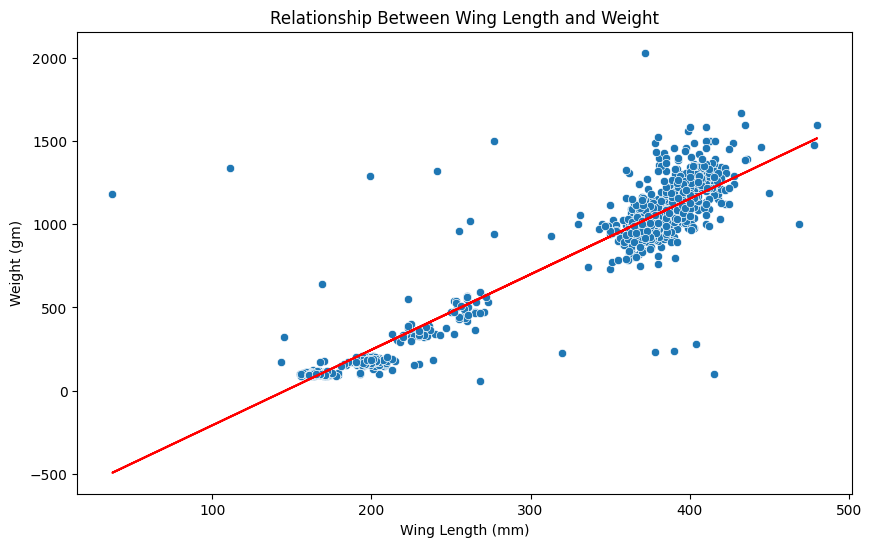

Correlation coefficient between Wing and Weight: 0.934895344648618
Slope: 4.535878052870784
Intercept: -661.8754302233609


In [ ]:
slope, intercept = np.polyfit(cleaned_data['Wing'], cleaned_data['Weight'], 1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Wing', y='Weight', data=cleaned_data)
plt.plot(cleaned_data['Wing'], slope*cleaned_data['Wing'] + intercept, color='red', label='Regression Line')
plt.title('Relationship Between Wing Length and Weight')
plt.xlabel('Wing Length (mm)')
plt.ylabel('Weight (gm)')
plt.show()

correlation = cleaned_data['Wing'].corr(cleaned_data['Weight'])
print("Correlation coefficient between Wing and Weight:", correlation)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


There is a relationship between wing lenght and weight (0.93). Birds with a higher weight also had longer wings

#Is there a difference in the weight of the male vs females for each species type

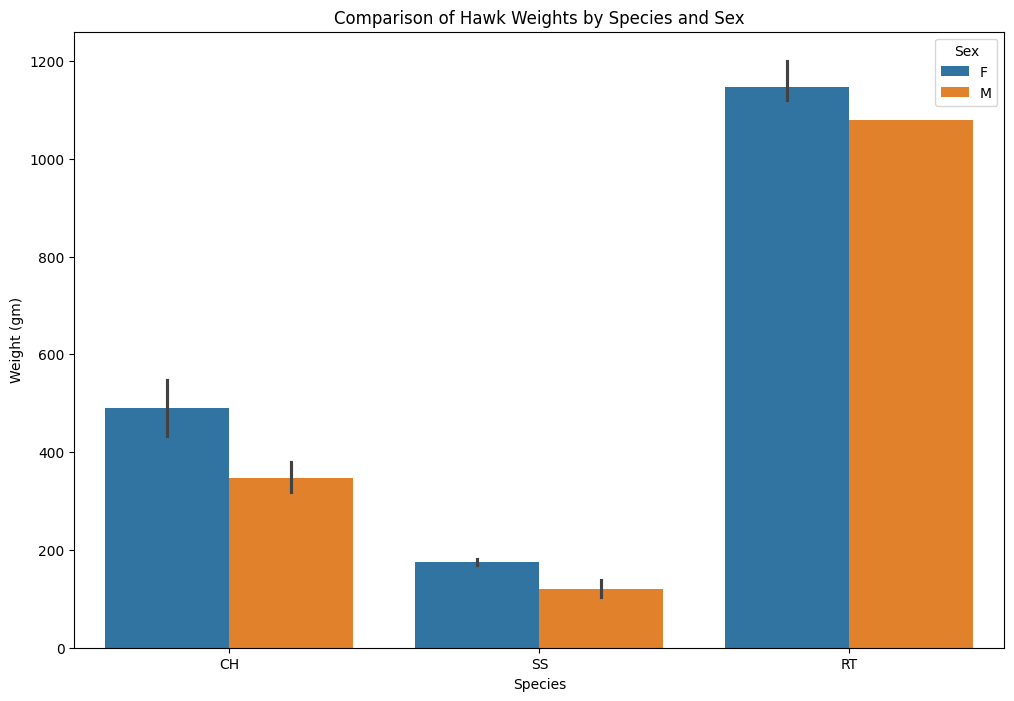

,Month,Day,Year,BandNumber,Species,Age,Sex,Wing,Weight
3,9,23,1992,745-49508,CH,I,F,265.0,470.0
4,9,27,1992,1253-98801,SS,I,F,205.0,170.0
24,10,23,1992,1173-19901,SS,I,M,173.0,100.0
27,10,27,1992,1253-98802,SS,I,F,205.0,180.0
38,9,13,1993,173-19904,SS,I,M,193.0,100.0
...,...,...,...,...,...,...,...,...,...
882,11,9,2003,803-05944,SS,I,F,198.0,190.0
883,11,9,2003,2003-99374,SS,I,F,190.0,200.0
884,11,11,2003,2003-99375,SS,I,F,197.0,185.0
886,11,14,2003,1213-58910,SS,I,F,200.0,185.0


In [ ]:
plt.figure(figsize=(12, 8))
filtered_data = cleaned_data[(cleaned_data['Sex'] != 'Unknown')]

sns.barplot(x='Species', y='Weight', hue='Sex', data=filtered_data)
plt.title('Comparison of Hawk Weights by Species and Sex')
plt.xlabel('Species')
plt.ylabel('Weight (gm)')
plt.show()

filtered_data

There is a difference in the weights between the male and females of the different species. The females had a higher weight than the males for all of the species. The RT only has females.

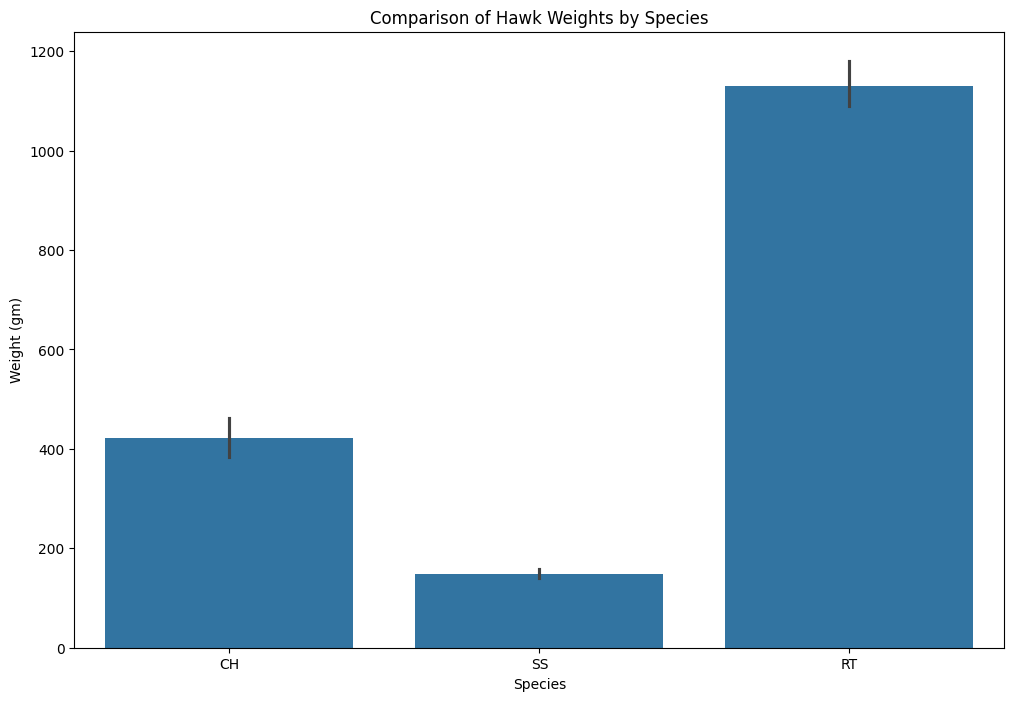

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Species', y='Weight', data=filtered_data)
plt.title('Comparison of Hawk Weights by Species')
plt.xlabel('Species')
plt.ylabel('Weight (gm)')
plt.show()


RT has the highest average hawk weight, followed by CH, and then SS.

#Relationship between age and weight

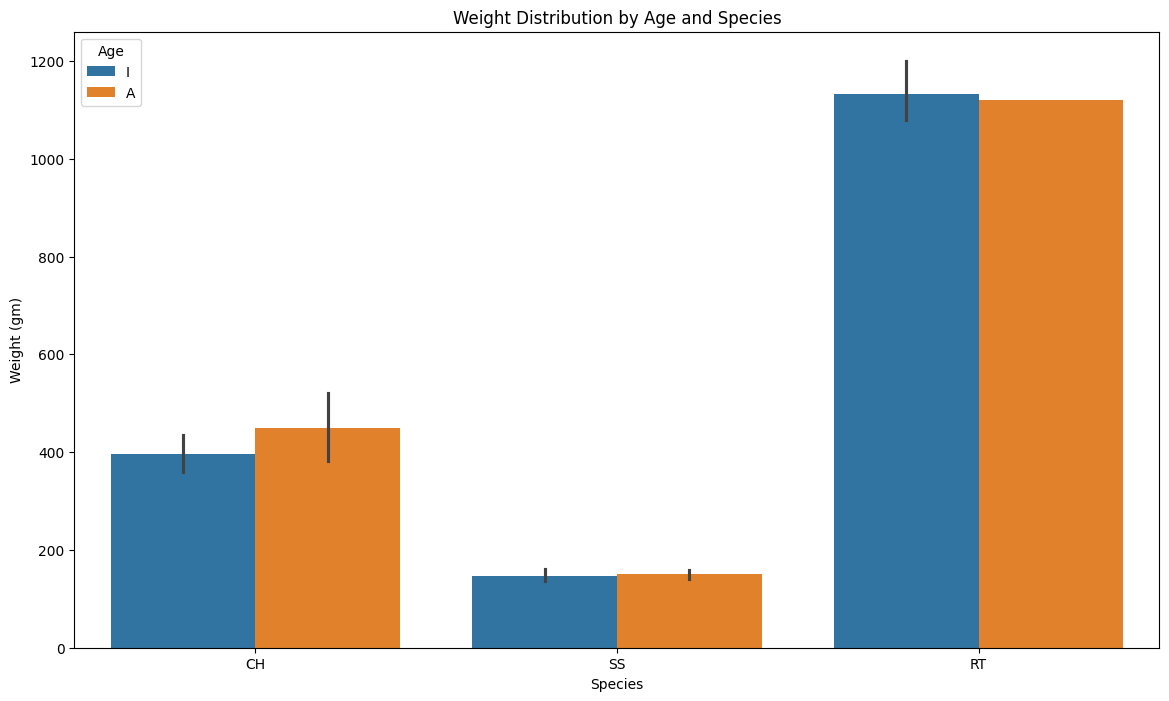

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Species', y='Weight', hue='Age', data=filtered_data)
plt.title('Weight Distribution by Age and Species')
plt.xlabel('Species')
plt.ylabel('Weight (gm)')
plt.legend(title='Age')
plt.show()

For CH and SS the Adult Hawks had a higher weight than the immature hawks. However, for RT the Immature had a higher average weight than the adults.

#How Many of Each Bird was Captured Each Year?

<Figure size 1200x800 with 0 Axes>

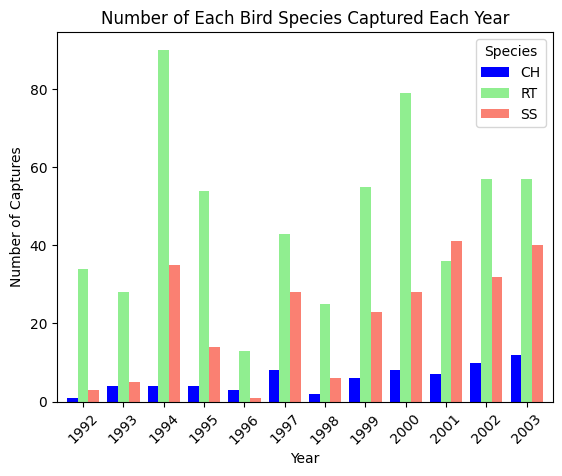

In [ ]:
grouped_data = cleaned_data.groupby(['Species', 'Year']).size().reset_index(name='Count')
pivot_table = grouped_data.pivot(index='Year', columns='Species', values='Count')

plt.figure(figsize=(12, 8))
colors = ['blue', 'lightgreen', 'salmon']
pivot_table.plot(kind='bar', color=colors, width=0.8)
plt.title('Number of Each Bird Species Captured Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Captures')
plt.legend(title='Species')
plt.xticks(rotation=45)  #better readability
plt.show()



Red-tailed Hawks (RT) had the highest number of captures in almost every year, except in 2001, when Sharp-Shinned Hawks (SS) surpassed them. Cooper's Hawks (CH) generally had the fewest captures each year, with the exception of 1996, when Sharp-Shinned Hawks (SS) were captured less frequently.

#Analyzing categorical distributions

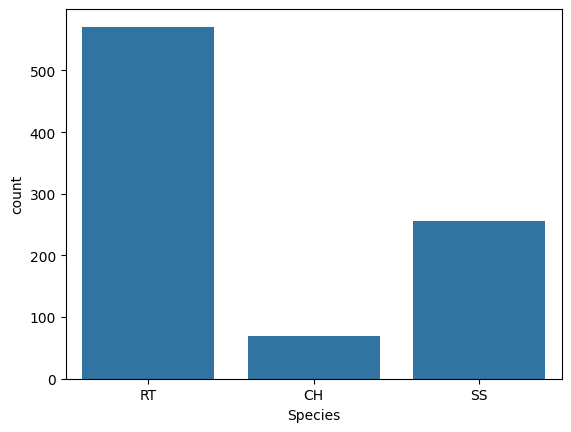

In [ ]:
sns.countplot(x='Species', data=cleaned_data)
plt.show()

Red-tailed Hawks (RT) were the most frequently captured species, while Cooper's Hawks (CH) had the lowest number of captures overall.

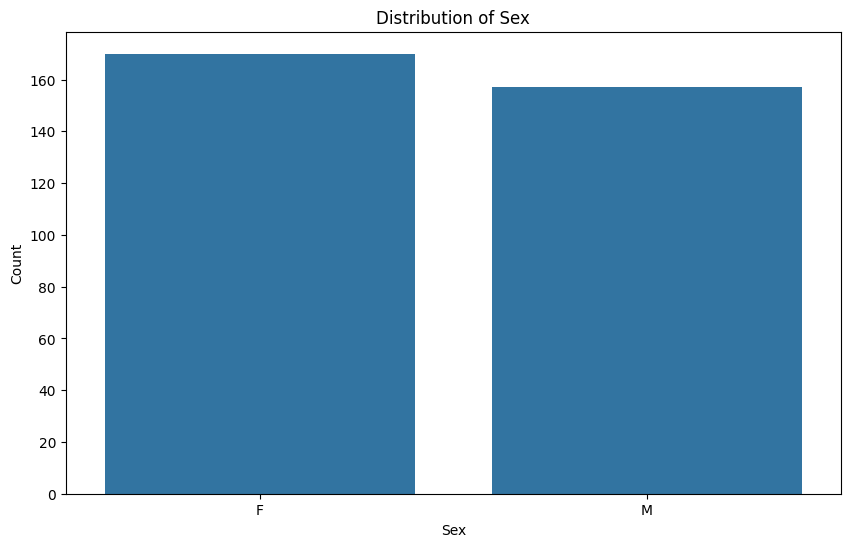

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='Sex')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


More female hawks were captured than males.

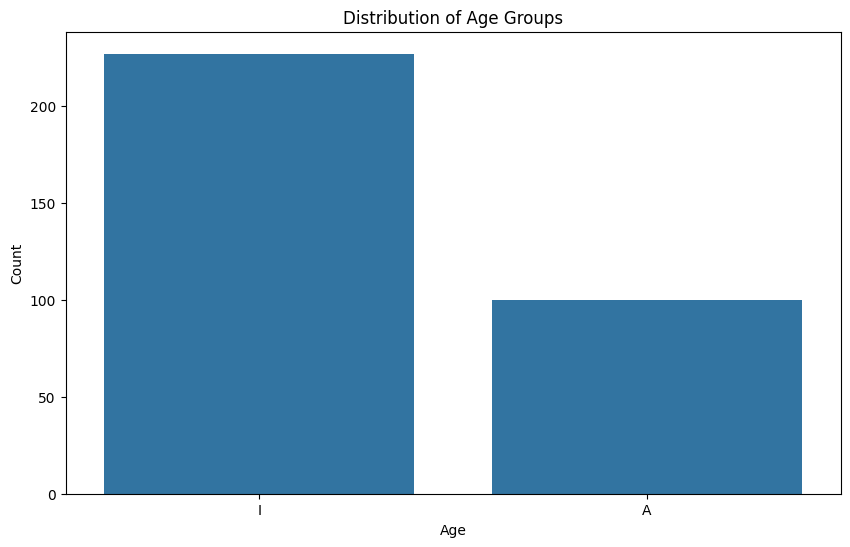

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='Age')
plt.title('Distribution of Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


More Immature Hawks were captured than Adult Hawks.

#Group data by species and calculate statistics

In [ ]:
#Making naming more descriptive.
#species_mapping = {
 #   'CH': "Cooper's Hawk",
  #  'RT': "Red-tailed Hawk",
   # 'SS': "Sharp-shinned Hawk"
#}
#cleaned_data['Species'] = cleaned_data['Species'].map(species_mapping)

#grouping data by species
grouped = cleaned_data.groupby('Species')
grouped

In [ ]:
#Describing data
grouped.describe()

Month                                                    Day  \
         count      mean       std  min  25%   50%   75%   max  count   
Species                                                                 
CH        69.0  9.623188  0.620755  9.0  9.0  10.0  10.0  11.0   69.0   
RT       571.0  9.931699  0.675818  8.0  9.0  10.0  10.0  11.0  571.0   
SS       256.0  9.714844  0.692208  9.0  9.0  10.0  10.0  11.0  256.0   

                                                            Year               \
              mean       std  min   25%   50%   75%   max  count         mean   
Species                                                                         
CH       15.681159  9.356490  1.0   6.0  17.0  24.0  31.0   69.0  1999.086957   
RT       15.619965  8.534608  1.0   8.0  15.0  23.0  31.0  571.0  1997.823117   
SS       15.976562  7.942899  1.0  10.0  15.0  22.0  31.0  256.0  1999.074219   

                                                            Wing              \
              std     min     25%     50%     75%     max  count        mean   
Species                                                                        
CH       3.288747  1992.0  1997.0  2000.0  2002.0  2003.0   69.0  244.144928   
RT       3.494139  1992.0  1994.0  1998.0  2001.0  2003.0  571.0  383.518739   
SS       3.236792  1992.0  1997.0  2000.0  2002.0  2003.0  256.0  184.835938   

                                                       Weight               \
               std    min     25%    50%    75%    max  count         mean   
Species                                                                      
CH       32.132664  145.0  227.00  240.0  260.0  377.0   69.0   419.623188   
RT       31.139020   37.2  372.00  384.0  399.0  480.0  571.0  1093.649737   
SS       22.525202  143.0  165.75  191.0  199.0  370.0  256.0   147.968750   

                                                            
                std    min    25%     50%      75%     max  
Species                                                     
CH       163.056748   56.0  335.0   375.0   505.00  1119.0  
RT       188.452684  101.0  980.0  1070.0  1210.00  2030.0  
SS        80.652675   85.0  100.0   155.0   177.75  1094.0

In [ ]:
# Show the frequency of different values in the column
cleaned_data['Species'].value_counts()


Species
RT    571
SS    256
CH     69
Name: count, dtype: int64

In [ ]:

cleaned_data.groupby('Species')['Wing'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
CH,69.0,244.14,32.13,145.0,227.00,240.0,260.0,377.0
RT,571.0,383.52,31.14,37.2,372.00,384.0,399.0,480.0
SS,256.0,184.84,22.53,143.0,165.75,191.0,199.0,370.0


# Coorelation

In [ ]:
# Filter for numeric data only
numeric_data = cleaned_data.select_dtypes(include=[np.number])

# Handling missing values: Impute or remove
# Let's drop any rows with missing numeric data for simplicity
numeric_data.dropna(inplace=True)

# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
           Month       Day      Year      Wing    Weight      Tail
Month   1.000000 -0.479240  0.013838  0.141398  0.184307  0.102112
Day    -0.479240  1.000000 -0.023814  0.008016 -0.011135 -0.005815
Year    0.013838 -0.023814  1.000000 -0.207456 -0.173881 -0.199121
Wing    0.141398  0.008016 -0.207456  1.000000  0.934895  0.900125
Weight  0.184307 -0.011135 -0.173881  0.934895  1.000000  0.874989
Tail    0.102112 -0.005815 -0.199121  0.900125  0.874989  1.000000


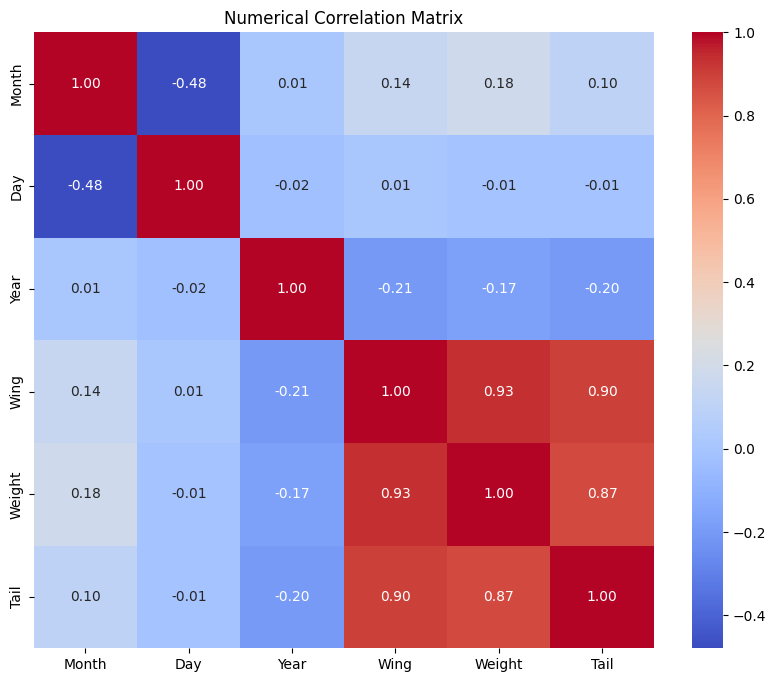

In [ ]:

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Numerical Correlation Matrix')
plt.show()


There is a coorelation between the Wing and Weight, tail and wing, and tail and weight.

#Pair plot

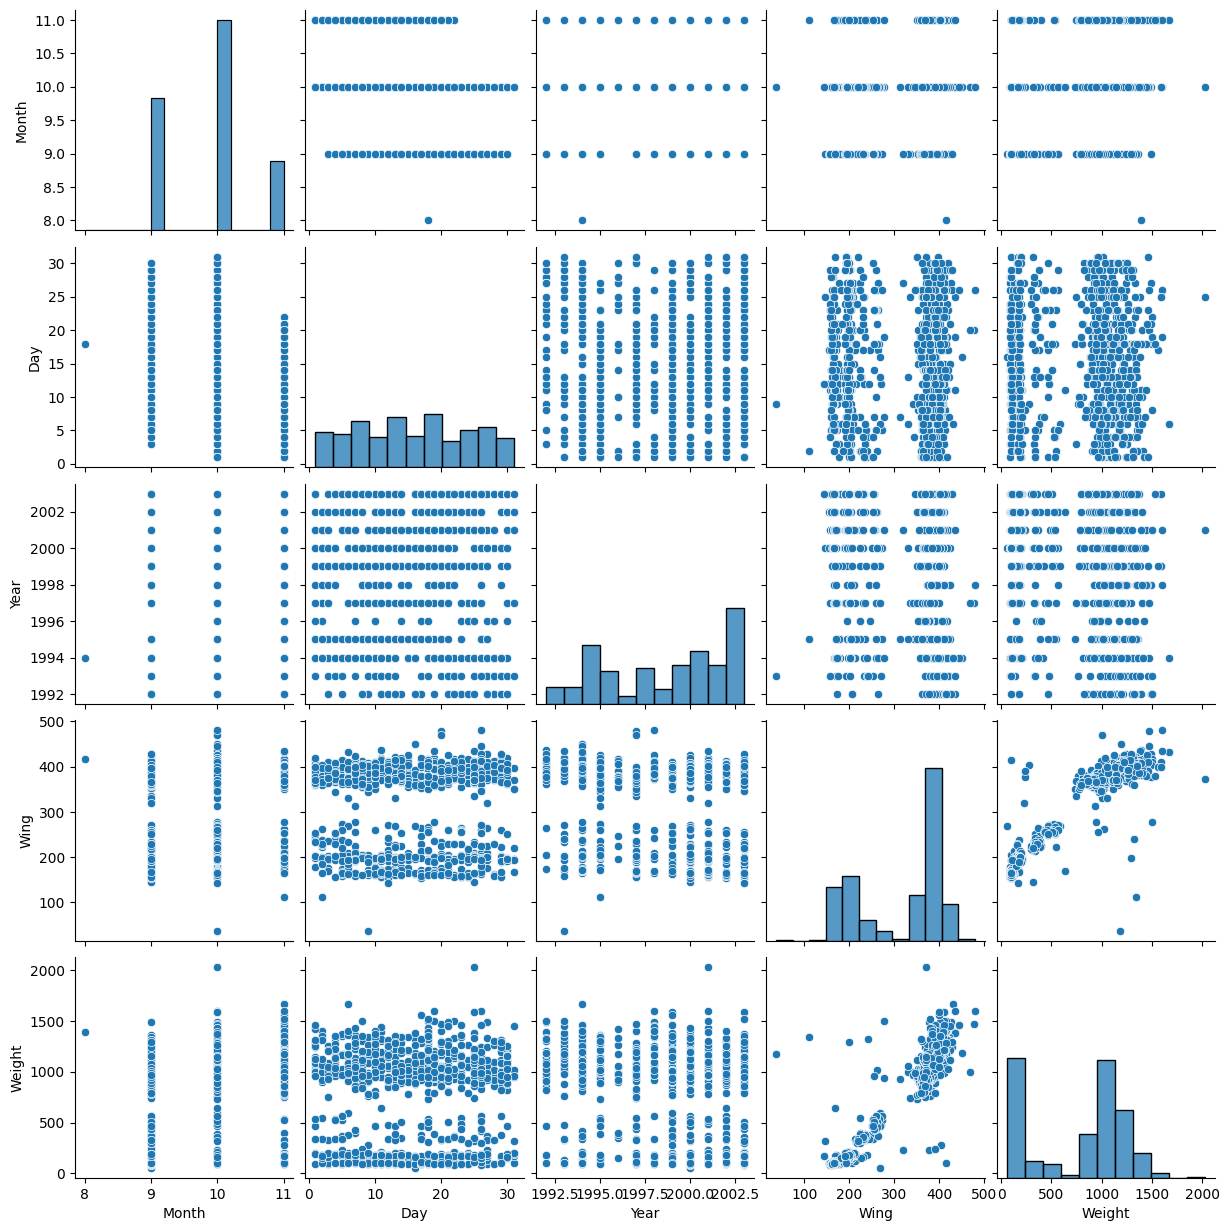

In [ ]:
relevant_features = correlation_matrix.columns[(correlation_matrix.abs() > 0.8).any()].tolist()
sns.pairplot(numeric_data[relevant_features])
plt.show()

#Plot of Wing Length vs Weight

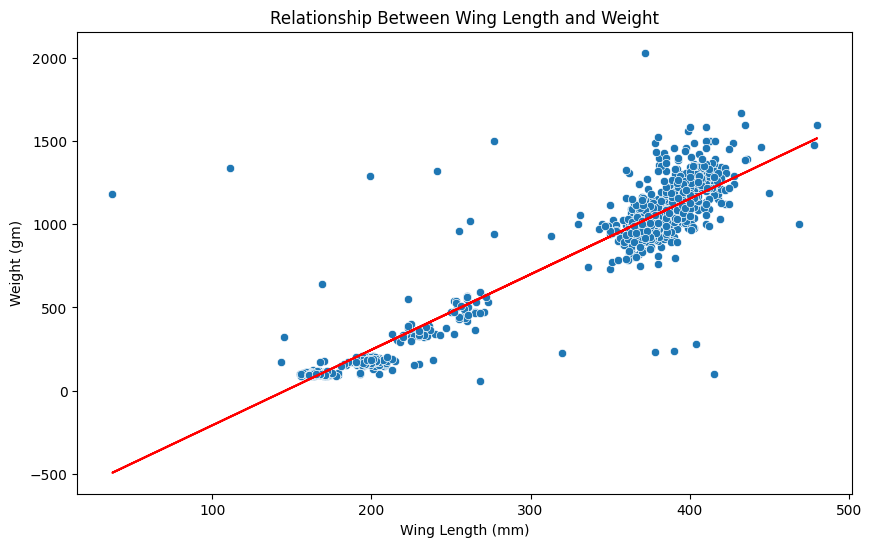

Correlation coefficient between Wing and Weight: 0.934895344648618
Slope: 4.535878052870784
Intercept: -661.8754302233609


In [ ]:
slope, intercept = np.polyfit(cleaned_data['Wing'], cleaned_data['Weight'], 1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Wing', y='Weight', data=cleaned_data)
plt.plot(cleaned_data['Wing'], slope*cleaned_data['Wing'] + intercept, color='red', label='Regression Line')
plt.title('Relationship Between Wing Length and Weight')
plt.xlabel('Wing Length (mm)')
plt.ylabel('Weight (gm)')
plt.show()

correlation = cleaned_data['Wing'].corr(cleaned_data['Weight'])
print("Correlation coefficient between Wing and Weight:", correlation)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")



There is a coorelation between the wing length and weight. The longer the wing the higher the weight. Meaning that there is more mass for a larger wing.

##Plot of Tail Length vs Weight

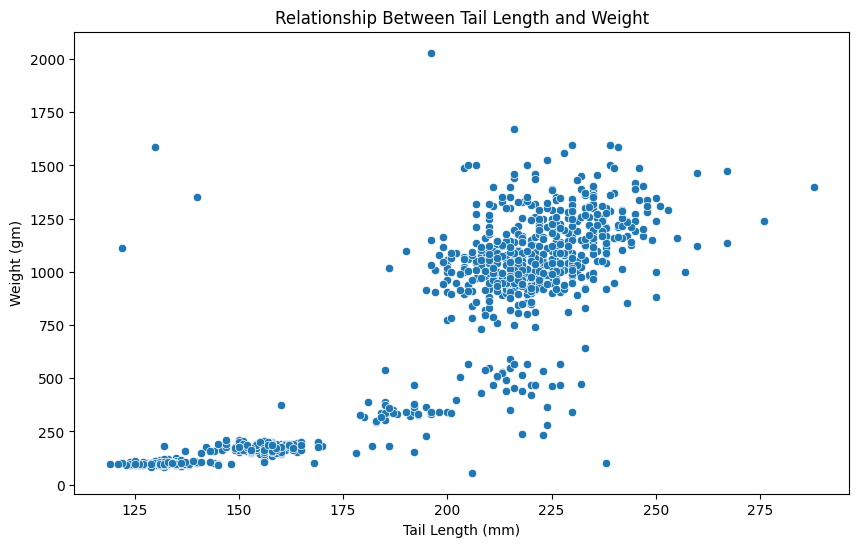

Correlation coefficient between Tail and Weight: 0.874989367456943
Slope: 1.0000000000000009
Intercept: 3.4776728305555226e-16


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tail', y='Weight', data=cleaned_data)
plt.title('Relationship Between Tail Length and Weight')
plt.xlabel('Tail Length (mm)')
plt.ylabel('Weight (gm)')
plt.show()

correlation = cleaned_data['Tail'].corr(cleaned_data['Weight'])
print("Correlation coefficient between Tail and Weight:", correlation)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


There is a coorelation between the tail length and weight. The longer the tail the higher the weight. Meaning that there is more mass for a larger tail.

##Plot of Tail Length vs Wing length

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tail', y='Wing', data=cleaned_data)
plt.title('Relationship Between Tail Length and Wing')
plt.xlabel('Tail Length (mm)')
plt.ylabel('Wing Length (mm)')
plt.show()

correlation = cleaned_data['Tail'].corr(cleaned_data['Wing'])
print("Correlation coefficient between Tail and Wing Length:", correlation)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


NameError: name 'plt' is not defined

There is a coorelation between tail length and wing size. The hawks with longer tails also have larger wings. Which is likely due to the overall Hawk being proportionally big.

#Pivot Tables

##Average Weight by Species and Age

In [ ]:
pivot_weight = cleaned_data.pivot_table(values='Weight', index='Species', columns='Age', aggfunc='mean')
print(pivot_weight)

Age                A            I
Species                          
CH        449.387097   395.342105
RT       1161.413223  1075.428889
SS        150.382353   147.095745


Red-tailed Hawks are the heaviest with adults averaging 1161.41 grams and immatures 1075.43 grams, indicating their larger size compared to Cooper's Hawks and Sharp-shinned Hawks. Cooper's Hawks show a noticeable weight gain as they mature, with adults averaging 449.39 grams compared to 395.34 grams for immatures. Sharp-shinned Hawks, the lightest among the three, exhibit the least variation in weight with age - adults weigh an average of 150.38 grams, only slightly heavier than the immatures at 147.10 grams.

##Monthly Capture Trends by Species

In [ ]:
monthly_captures = cleaned_data.pivot_table(values='BandNumber', index='Month', columns='Species', aggfunc='count')
monthly_captures

Species,CH,RT,SS
Month,,,
8,NaN,1.0,NaN
9,31.0,148.0,108.0
10,33.0,311.0,113.0
11,5.0,111.0,35.0


Shows the montly captures during the migratory months from August to November. In August, captures are minimal, with only a single Red-tailed Hawk reported, suggesting that this month might be too early for peak migration activity for these species. As autumn progresses, the numbers increase significantly. September shows a significant rise in captures, with 148 Red-tailed Hawks, 31 Cooper's Hawks, and 108 Sharp-shinned Hawks, indicating the start of peak migration. it reaches its highest in October, particularly for Red-tailed Hawks, where captures go to 311. Cooper's Hawks and Sharp-shinned Hawks also show high numbers in October with 33 and 113 captures. However, by November, there is a decline across all species with 111 Red-tailed Hawks, 5 Cooper's Hawks, and 35 Sharp-shinned Hawks captured, suggesting the tail end of the migration period as winter approaches.

##Average Measurements by Species and Sex

In [ ]:
average_measurements = cleaned_data.pivot_table(values=['Wing', 'Weight'], index='Species', columns='Sex', aggfunc='mean')
average_measurements

Weight                                  Wing              \
Sex                F            M      Unknown           F           M   
Species                                                                  
CH        490.314286   347.545455   324.000000  257.257143  230.575758   
RT       1146.666667  1080.000000  1093.393298  415.000000  381.000000   
SS        174.901515   119.495935    95.000000  197.984848  170.886179   

                     
Sex         Unknown  
Species              
CH       233.000000  
RT       383.356614  
SS       165.000000

Females generally exhibit higher than average weigths compared to males. For Cooper's Hawks, females weigh an average of 490.31 grams, significantly heavier than males at 347.55 grams. This trend is consistent in Red-tailed Hawks and Sharp-shinned Hawks.Sharp-shinned Hawks show the most pronounced difference, with female weights averaging at 174.90 grams and male weights at a significantly lower 119.50 grams. Wing lengths follow a similar pattern across all species, with females exhibiting larger dimensions.

##Yearly Health Trends using Uncleaned Data

In [ ]:
yearly_health = data.pivot_table(values=['KeelFat', 'WingPitFat'], index='Year', columns='Species', aggfunc='mean')
yearly_health

KeelFat                     WingPitFat               
Species        CH        RT        SS         CH   RT        SS
Year                                                           
1997     0.750000  0.682927  1.137931       0.75  0.4  1.344828
1999     2.200000  1.615385  2.521739        NaN  NaN       NaN
2000     2.125000  1.812500  3.034483        NaN  NaN       NaN
2001     2.285714  2.291667  3.024390        NaN  NaN       NaN
2002     2.600000  2.333333  3.281250        NaN  NaN       NaN
2003     2.291667  2.219298  3.200000        NaN  NaN       NaN

Over the years, both Red-tailed Hawks and Cooper's Hawks exhibit a gradual increase in keel fat scores, indicating an improving trend in their nutritional reserves. Starting from lower values in 1997, Red-tailed Hawks increased from an average keel fat score of approximately 0.68 to 2.22 by 2003, and Cooper's Hawks showed a similar upward trend from 0.75 to 2.29 over the same period.

## Condition and Health Indicators by Age and Species

In [ ]:
health_indicators = data.pivot_table(values=['KeelFat', 'WingPitFat'], index=['Species', 'Age'], aggfunc='mean')
health_indicators

KeelFat  WingPitFat
Species Age                      
CH      A    2.320000    0.500000
        I    1.820000    0.833333
RT      A    2.091549    1.000000
        I    1.787698    0.333333
SS      A    3.062500    1.500000
        I    2.641304    1.333333

For Cooper's Hawks, adults have a keel fat score of 2.32 and a wing pit fat score of 0.5. Immatures present a lower keel fat score of 1.82 but a higher wing pit fat score of 0.833, suggesting a different allocation of fat reserves. Red-tailed Hawks show a similar pattern where adults have marginally better overall fat reserves (keel fat at 2.09 and wing pit fat at 1.0) compared to immatures who display significantly lower wing pit fat scores at 0.333 alongside a keel fat score of 1.79. In contrast, Sharp-shinned Hawks exhibit the highest fat reserves across both categories, with adults scoring 3.06 in keel fat and 1.5 in wing pit fat, while immatures also display robust scores of 2.64 and 1.33.

##Average Wing Length by Species and Age

In [ ]:
wing_length_by_species_age = cleaned_data.pivot_table(values='Wing', index='Species', columns='Age', aggfunc='mean')
wing_length_by_species_age

Age,A,I
Species,,
CH,242.483871,245.500000
RT,385.950413,382.864889
SS,185.573529,184.569149


For Cooper's Hawks, the average wing length recorded is 242.48 mm for adults and 245.50 mm for immatures, an intriguing observation as it suggests that immatures, on average, have slightly larger wings than adults. In contrast, Red-tailed Hawks show a more expected pattern where adults have a marginally larger average wing length of 385.95 mm compared to 382.86 mm for immatures. Sharp-shinned Hawks also demonstrate minimal differences in wing length between adults and immatures, with adults averaging 185.57 mm and immatures 184.57 mm.

## Average Weight by Species and Sex

In [ ]:

weight_by_species_sex = cleaned_data.pivot_table(values='Weight', index='Species', columns='Sex', aggfunc='mean')
weight_by_species_sex

Sex,F,M,Unknown
Species,,,
CH,490.314286,347.545455,324.000000
RT,1146.666667,1080.000000,1093.393298
SS,174.901515,119.495935,95.000000


For Cooper's Hawks, females have an average weight of 490.31 grams, significantly heavier than males who average 347.55 grams. This trend can also be seen in Red-tailed Hawks, where females weigh on average 1146.67 grams, compared to 1080.00 grams for males. Similarly, Sharp-shinned Hawks show a significant weight difference with females weighing 174.90 grams, much more than males at 119.50 grams.

##Capture Frequency by Year and Species

In [ ]:
captures_by_year_species = cleaned_data.pivot_table(values='BandNumber', index='Year', columns='Species', aggfunc='count')
captures_by_year_species

Species,CH,RT,SS
Year,,,
1992,1,34,3
1993,4,28,5
1994,4,90,35
1995,4,54,14
1996,3,13,1
1997,8,43,28
1998,2,25,6
1999,6,55,23
2000,8,79,28


 Red-tailed Hawks consistently showing higher capture frequencies compared to the other two species, reflecting on their greater abundance or visibility within the capture areas.Cooper's Hawks and Sharp-shinned Hawks exhibit lower and more variable capture rates.

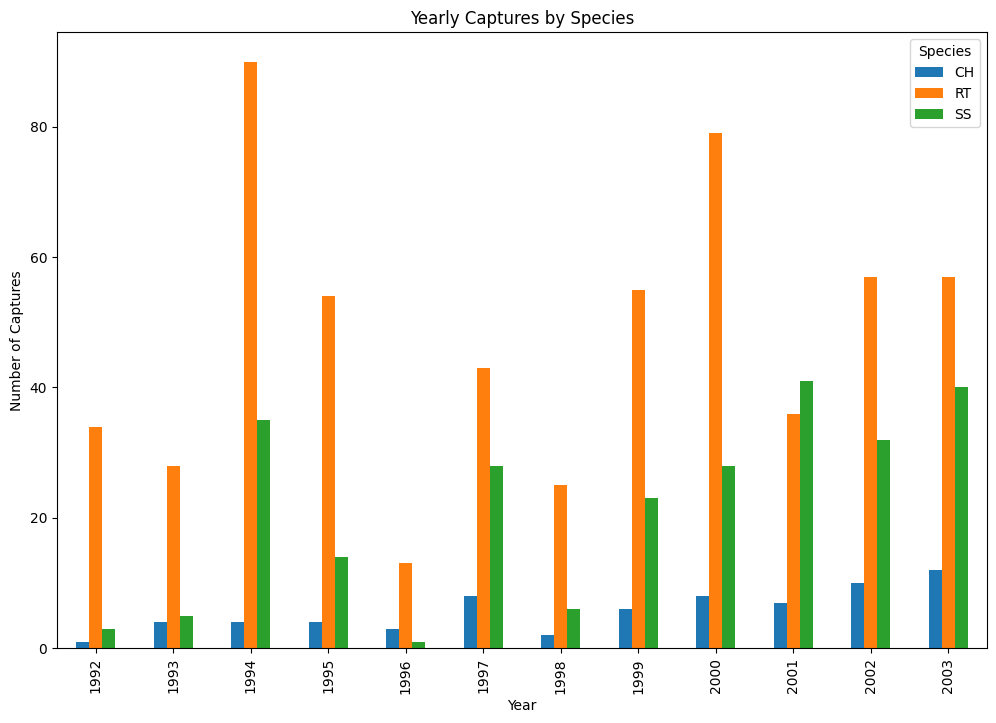

In [ ]:
# Plotting Yearly Captures
pivot_yearly_captures.plot(kind='bar', figsize=(12, 8))
plt.title('Yearly Captures by Species')
plt.xlabel('Year')
plt.ylabel('Number of Captures')
plt.legend(title='Species')
plt.show()

#Queries

##List the hawks that have wing sizes over 265

In [ ]:
cleaned_data[cleaned_data['Wing'] > 265]


,Month,Day,Year,BandNumber,Species,Age,Sex,Wing,Weight
0,9,19,1992,877-76317,RT,I,Unknown,385.0,920.0
1,9,22,1992,877-76318,RT,I,Unknown,376.0,930.0
2,9,23,1992,877-76319,RT,I,Unknown,381.0,990.0
5,9,28,1992,1207-55910,RT,I,Unknown,412.0,1090.0
6,9,28,1992,877-76320,RT,I,Unknown,370.0,960.0
...,...,...,...,...,...,...,...,...,...
889,11,18,2003,1177-04776,RT,A,Unknown,402.0,1350.0
890,11,18,2003,1207-53144,RT,I,Unknown,366.0,805.0
891,11,18,2003,1177-04777,RT,I,Unknown,380.0,1525.0
893,11,19,2003,1807-53145,RT,I,Unknown,360.0,790.0


There are 575 Hawks that have a wing size over 265mm.

##List the hawks with weight over 1,000 and tail > 230.

In [ ]:
cleaned_data[(cleaned_data['Weight'] > 1000) & (cleaned_data['Tail'] > 230)]

,Month,Day,Year,BandNumber,Species,Age,Sex,Wing,Weight,Tail
9,9,30,1992,1207-55911,RT,I,Unknown,405.0,1120.0,238
14,10,11,1992,1207-55912,RT,I,Unknown,416.0,1170.0,243
15,10,11,1992,1207-55913,RT,A,Unknown,436.0,1390.0,232
16,10,11,1992,877-76326,RT,I,Unknown,418.0,1150.0,238
21,10,14,1992,877-76331,RT,I,Unknown,416.0,1190.0,237
...,...,...,...,...,...,...,...,...,...,...
868,10,13,2003,1207-72685,RT,I,Unknown,415.0,1285.0,242
871,10,18,2003,788-36611,RT,A,Unknown,411.0,1220.0,236
874,10,21,2003,1207-72686,RT,I,Unknown,393.0,1265.0,233
879,10,25,2003,1207-72687,RT,I,Unknown,400.0,1585.0,241


There are 122 Hawks with a weight over 1000 and a tail length over 230mm.

##List the red-tailed hawks captured in October

In [ ]:
cleaned_data[(cleaned_data['Species'] == 'RT') & (cleaned_data['Month'] == 10)]


,Month,Day,Year,BandNumber,Species,Age,Sex,Wing,Weight,Tail
10,10,5,1992,877-76323,RT,I,Unknown,393.0,1010.0,222
11,10,8,1992,877-76324,RT,I,Unknown,371.0,1010.0,217
12,10,9,1992,877-76325,RT,A,Unknown,390.0,1120.0,213
14,10,11,1992,1207-55912,RT,I,Unknown,416.0,1170.0,243
15,10,11,1992,1207-55913,RT,A,Unknown,436.0,1390.0,232
...,...,...,...,...,...,...,...,...,...,...
881,10,25,2003,1807-53142,RT,A,Unknown,371.0,1115.0,208
882,10,25,2003,1177-04766,RT,A,Unknown,370.0,1145.0,212
884,10,26,2003,1177-04767,RT,A,Unknown,347.0,990.0,203
885,10,30,2003,1177-04768,RT,I,Unknown,363.0,945.0,218


There were 311 Red-tailed hawks tht were captured in October.